In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [90]:
df=pd.read_csv("./Dataset/hiring.csv")
df.head(5)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [91]:
df["experience"]=df["experience"].fillna("zero")

In [92]:
df.head(2)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000


In [93]:
mode=df["test_score(out of 10)"].median()

In [94]:
df["test_score(out of 10)"]=df["test_score(out of 10)"].fillna(mode)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [95]:
df.isnull().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [96]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le=LabelEncoder()
df["experience"]=le.fit_transform(df["experience"])

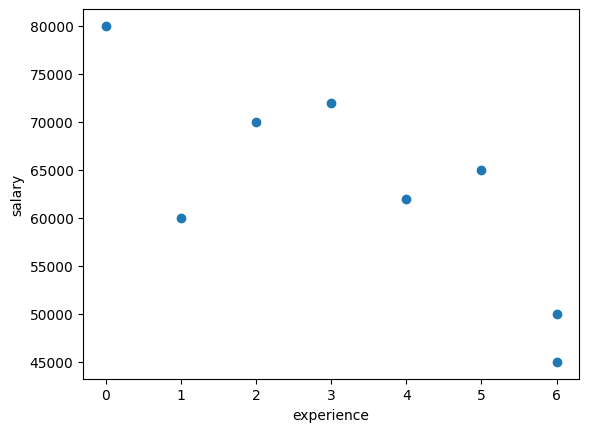

In [99]:
plt.xlabel("experience")
plt.ylabel("salary")
plt.scatter(df["experience"],df["salary($)"])

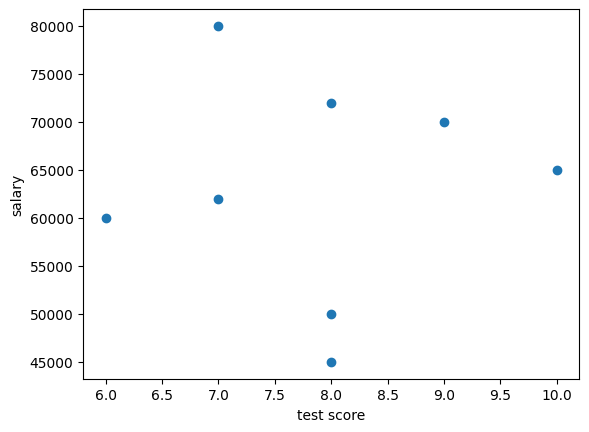

In [100]:
plt.xlabel("test score")
plt.ylabel("salary")
plt.scatter(df["test_score(out of 10)"],df["salary($)"])

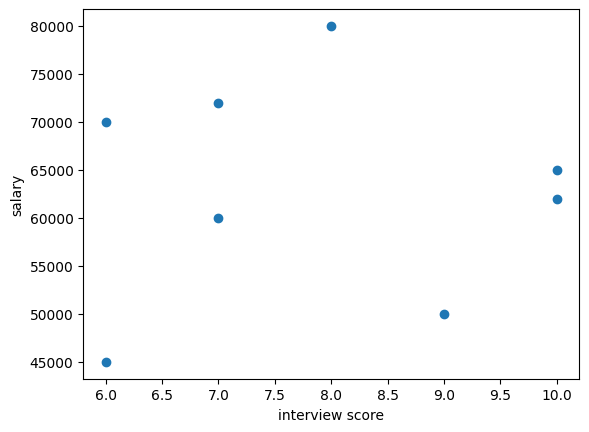

In [101]:
plt.xlabel("interview score")
plt.ylabel("salary")
plt.scatter(df["interview_score(out of 10)"],df["salary($)"])

In [102]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [103]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [104]:
test_data = {
    'experience': [3, 5, 7, 2, 4],
    'test_score(out of 10)': [8, 7, 6, 9, 5],
    'interview_score(out of 10)': [9, 6, 8, 7, 5]
}
test=pd.DataFrame(test_data)

In [105]:
test["salary"]=reg.predict(test)
test

,experience,test_score(out of 10),interview_score(out of 10),salary
0,3,8,9,67879.875158
1,5,7,6,46292.092536
2,7,6,8,34621.042098
3,2,9,7,73999.785576
4,4,5,5,40788.959569
